# Specify each path

In [61]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [62]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [63]:
NUM_CLASSES = 9

# Dataset reading

In [64]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
print(len(X_dataset))

8557


In [65]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [67]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [68]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_6 (Dropout)         (None, 42)                0         
                                                                 
 dense_9 (Dense)             (None, 20)                860       
                                                                 
 dropout_7 (Dropout)         (None, 20)                0         
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dense_11 (Dense)            (None, 9)                 99        
                                                                 
Total params: 1169 (4.57 KB)
Trainable params: 1169 (4.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [70]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [71]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
36/51 [====================>.........] - ETA: 0s - loss: 2.1767 - accuracy: 0.1523
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
51/51 [==============================] - 2s 14ms/step - loss: 2.1478 - accuracy: 0.1683 - val_loss: 2.0135 - val_accuracy: 0.2495
Epoch 2/1000
18/51 [=========>....................] - ETA: 0s - loss: 2.0252 - accuracy: 0.2474

C:\Users\ongxu\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


40/51 [======================>.......] - ETA: 0s - loss: 1.9788 - accuracy: 0.2650
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1.9596 - accuracy: 0.2691 - val_loss: 1.8213 - val_accuracy: 0.3860
Epoch 3/1000
39/51 [=====================>........] - ETA: 0s - loss: 1.8294 - accuracy: 0.3117
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 1.8201 - accuracy: 0.3137 - val_loss: 1.6707 - val_accuracy: 0.3692
Epoch 4/1000
38/51 [=====================>........] - ETA: 0s - loss: 1.7111 - accuracy: 0.3460
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 1.7019 - accuracy: 0.3458 - val_loss: 1.5522 - val_accuracy: 0.4070
Epoch 5/1000
50/51 [============================>.] - ETA: 0s - loss: 1.6224 - accuracy: 0.3630
Epoch 5: savin

26/51 [==============>...............] - ETA: 0s - loss: 1.0641 - accuracy: 0.5968
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 1.0684 - accuracy: 0.5920 - val_loss: 0.7684 - val_accuracy: 0.8121
Epoch 30/1000
46/51 [==========================>...] - ETA: 0s - loss: 1.0865 - accuracy: 0.5754
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
51/51 [==============================] - 0s 9ms/step - loss: 1.0867 - accuracy: 0.5741 - val_loss: 0.7635 - val_accuracy: 0.8276
Epoch 31/1000
28/51 [===============>..............] - ETA: 0s - loss: 1.0801 - accuracy: 0.5809
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
51/51 [==============================] - 0s 3ms/step - loss: 1.0630 - accuracy: 0.5895 - val_loss: 0.7658 - val_accuracy: 0.8047
Epoch 32/1000
49/51 [===========================>..] - ETA: 0s - loss: 1.0404 - accuracy: 0.6004
Epoch 32

42/51 [=======================>......] - ETA: 0s - loss: 0.9415 - accuracy: 0.6440
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 0.9394 - accuracy: 0.6467 - val_loss: 0.6261 - val_accuracy: 0.8322
Epoch 57/1000
45/51 [=========================>....] - ETA: 0s - loss: 0.9506 - accuracy: 0.6457
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 0.9464 - accuracy: 0.6480 - val_loss: 0.6165 - val_accuracy: 0.8523
Epoch 58/1000
51/51 [==============================] - ETA: 0s - loss: 0.9227 - accuracy: 0.6536
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 0.9227 - accuracy: 0.6536 - val_loss: 0.6099 - val_accuracy: 0.8575
Epoch 59/1000
50/51 [============================>.] - ETA: 0s - loss: 0.9336 - accuracy: 0.6570
Epoch 59

47/51 [==========================>...] - ETA: 0s - loss: 0.8802 - accuracy: 0.6794
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 0.8828 - accuracy: 0.6784 - val_loss: 0.5684 - val_accuracy: 0.8547
Epoch 84/1000
47/51 [==========================>...] - ETA: 0s - loss: 0.8873 - accuracy: 0.6813
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 0.8852 - accuracy: 0.6826 - val_loss: 0.5549 - val_accuracy: 0.8612
Epoch 85/1000
44/51 [========================>.....] - ETA: 0s - loss: 0.8633 - accuracy: 0.6850
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
51/51 [==============================] - 0s 5ms/step - loss: 0.8677 - accuracy: 0.6840 - val_loss: 0.5612 - val_accuracy: 0.8509
Epoch 86/1000
51/51 [==============================] - ETA: 0s - loss: 0.8878 - accuracy: 0.6749
Epoch 86

46/51 [==========================>...] - ETA: 0s - loss: 0.8463 - accuracy: 0.6948
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 0.8478 - accuracy: 0.6946 - val_loss: 0.5440 - val_accuracy: 0.8514
Epoch 111/1000
46/51 [==========================>...] - ETA: 0s - loss: 0.8502 - accuracy: 0.6892
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 0.8549 - accuracy: 0.6883 - val_loss: 0.5352 - val_accuracy: 0.8575
Epoch 112/1000
47/51 [==========================>...] - ETA: 0s - loss: 0.8530 - accuracy: 0.6970
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
51/51 [==============================] - 0s 4ms/step - loss: 0.8572 - accuracy: 0.6963 - val_loss: 0.5296 - val_accuracy: 0.8631
Epoch 113/1000
51/51 [==============================] - ETA: 0s - loss: 0.8516 - accuracy: 0.6928
Ep

Epoch 137/1000
42/51 [=======================>......] - ETA: 0s - loss: 0.8420 - accuracy: 0.6884
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
51/51 [==============================] - 0s 6ms/step - loss: 0.8442 - accuracy: 0.6860 - val_loss: 0.5363 - val_accuracy: 0.8505
Epoch 138/1000
50/51 [============================>.] - ETA: 0s - loss: 0.8488 - accuracy: 0.6920
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
51/51 [==============================] - 1s 10ms/step - loss: 0.8484 - accuracy: 0.6924 - val_loss: 0.5125 - val_accuracy: 0.8612
Epoch 139/1000
36/51 [====================>.........] - ETA: 0s - loss: 0.8189 - accuracy: 0.7105
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
51/51 [==============================] - 0s 7ms/step - loss: 0.8183 - accuracy: 0.7091 - val_loss: 0.5140 - val_accuracy: 0.8565
Epoch 140/1000
51/51 [==============================] - ETA: 0s - loss: 0.8397 - acc

In [72]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

17/17 [==============================] - 0s 2ms/step - loss: 0.5139 - accuracy: 0.8631


In [73]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [74]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 117ms/step
[6.6643208e-02 1.3554154e-01 8.0331177e-02 2.9439599e-07 8.2272050e-11
 5.0119114e-01 6.8523713e-07 2.1628861e-01 3.2656740e-06]
5


# Confusion matrix

67/67 [==============================] - 0s 5ms/step


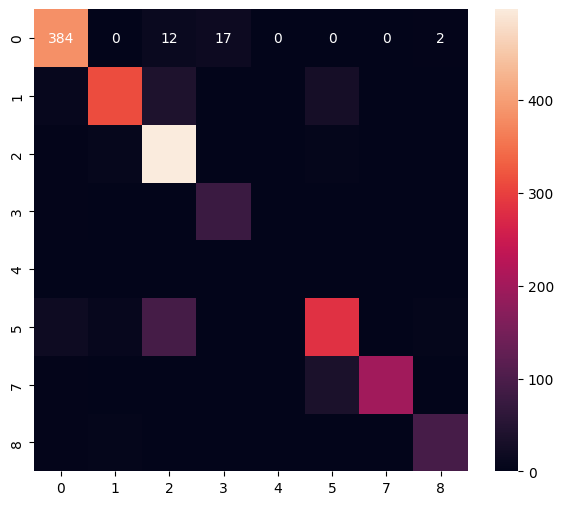

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       415
           1       0.94      0.80      0.86       391
           2       0.78      0.97      0.86       511
           3       0.81      0.97      0.89        79
           4       0.00      0.00      0.00         1
           5       0.80      0.70      0.75       406
           7       1.00      0.84      0.91       237
           8       0.94      0.92      0.93       100

    accuracy                           0.86      2140
   macro avg       0.77      0.77      0.77      2140
weighted avg       0.87      0.86      0.86      2140



C:\Users\ongxu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ongxu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ongxu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [76]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\Users\ongxu\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [77]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\ongxu\AppData\Local\Temp\tmp42a2xrv6\assets


INFO:tensorflow:Assets written to: C:\Users\ongxu\AppData\Local\Temp\tmp42a2xrv6\assets


6816

# Inference test

In [78]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [79]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [80]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [81]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 998 µs


In [82]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[6.6643223e-02 1.3554162e-01 8.0331109e-02 2.9439542e-07 8.2271891e-11
 5.0119114e-01 6.8523707e-07 2.1628866e-01 3.2656740e-06]
5
